# 📘 Diccionario de Datos

---

### `Previous qualification`
- **Tipo**: `Integer`
- **Descripción**: Nivel educativo previo del estudiante

| Código | Descripción                                                         |
|--------|---------------------------------------------------------------------|
| 1      | Secondary education                                                 |
| 2      | Higher education - bachelor's degree                                |
| 3      | Higher education - degree                                           |
| 4      | Higher education - master's                                         |
| 5      | Higher education - doctorate                                        |
| 6      | Frequency of higher education                                       |
| 9      | 12th year of schooling - not completed                              |
| 10     | 11th year of schooling - not completed                              |
| 12     | Other - 11th year of schooling                                      |
| 14     | 10th year of schooling                                              |
| 15     | 10th year of schooling - not completed                              |
| 19     | Basic education 3rd cycle (9th/10th/11th year) or equivalent        |
| 38     | Basic education 2nd cycle (6th/7th/8th year) or equivalent          |
| 39     | Technological specialization course                                 |
| 40     | Higher education - degree (1st cycle)                               |
| 42     | Professional higher technical course                                |
| 43     | Higher education - master (2nd cycle)                               |

---

### `Previous qualification (grade)`
- **Tipo**: `Continuous`
- **Descripción**: Calificación del título previo (entre 0 y 200)

---

### `Mother's occupation`
- **Tipo**: `Integer`
- **Descripción**: Ocupación de la madre

| Código | Descripción                                                                                   |
|--------|-----------------------------------------------------------------------------------------------|
| 0      | Student                                                                                       |
| 1      | Representatives of the Legislative Power and Executive Bodies, Directors and Executive Managers |
| 2      | Specialists in Intellectual and Scientific Activities                                         |
| 3      | Intermediate Level Technicians and Professions                                                |
| 4      | Administrative staff                                                                          |
| 5      | Personal Services, Security and Safety Workers and Sellers                                   |
| 6      | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                           |
| 7      | Skilled Workers in Industry, Construction and Craftsmen                                       |
| 8      | Installation and Machine Operators and Assembly Workers                                       |
| 9      | Unskilled Workers                                                                             |
| 10     | Armed Forces Professions                                                                      |
| 90     | Other Situation                                                                               |
| 99     | (blank)                                                                                       |
| 122    | Health professionals                                                                          |
| 123    | Teachers                                                                                      |
| 125    | Specialists in information and communication technologies (ICT)                               |
| 131    | Intermediate level science and engineering technicians and professions                        |
| 132    | Technicians and professionals, of intermediate level of health                                |
| 134    | Intermediate level technicians from legal, social, sports, cultural and similar services      |
| 141    | Office workers, secretaries in general and data processing operators                          |
| 143    | Data, accounting, statistical, financial services and registry-related operators              |
| 144    | Other administrative support staff                                                            |
| 151    | Personal service workers                                                                      |
| 152    | Sellers                                                                                       |
| 153    | Personal care workers and the like                                                            |
| 171    | Skilled construction workers and the like, except electricians                                |
| 173    | Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like |
| 175    | Workers in food processing, woodworking, clothing and other industries and crafts             |
| 191    | Cleaning workers                                                                              |
| 192    | Unskilled workers in agriculture, animal production, fisheries and forestry                   |
| 193    | Unskilled workers in extractive industry, construction, manufacturing and transport           |
| 194    | Meal preparation assistants                                                                   |

---

### `Father's occupation`
- **Tipo**: `Integer`
- **Descripción**: Ocupación del padre

| Código | Descripción                                                                                   |
|--------|-----------------------------------------------------------------------------------------------|
| 0      | Student                                                                                       |
| 1      | Representatives of the Legislative Power and Executive Bodies, Directors and Executive Managers |
| 2      | Specialists in Intellectual and Scientific Activities                                         |
| 3      | Intermediate Level Technicians and Professions                                                |
| 4      | Administrative staff                                                                          |
| 5      | Personal Services, Security and Safety Workers and Sellers                                   |
| 6      | Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                           |
| 7      | Skilled Workers in Industry, Construction and Craftsmen                                       |
| 8      | Installation and Machine Operators and Assembly Workers                                       |
| 9      | Unskilled Workers                                                                             |
| 10     | Armed Forces Professions                                                                      |
| 90     | Other Situation                                                                               |
| 99     | (blank)                                                                                       |
| 101    | Armed Forces Officers                                                                         |
| 102    | Armed Forces Sergeants                                                                        |
| 103    | Other Armed Forces personnel                                                                  |
| 112    | Directors of administrative and commercial services                                           |
| 114    | Hotel, catering, trade and other services directors                                           |
| 121    | Specialists in the physical sciences, mathematics, engineering and related techniques         |
| 122    | Health professionals                                                                          |
| 123    | Teachers                                                                                      |
| 124    | Specialists in finance, accounting, administrative organization, public and commercial relations |
| 131    | Intermediate level science and engineering technicians and professions                        |
| 132    | Technicians and professionals, of intermediate level of health                                |
| 134    | Intermediate level technicians from legal, social, sports, cultural and similar services      |
| 135    | Information and communication technology technicians                                          |
| 141    | Office workers, secretaries in general and data processing operators                          |
| 143    | Data, accounting, statistical, financial services and registry-related operators              |
| 144    | Other administrative support staff                                                            |
| 151    | Personal service workers                                                                      |
| 152    | Sellers                                                                                       |
| 153    | Personal care workers and the like                                                            |
| 154    | Protection and security services personnel                                                    |
| 161    | Market-oriented farmers and skilled agricultural and animal production workers                |
| 163    | Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence                     |
| 171    | Skilled construction workers and the like, except electricians                                |
| 172    | Skilled workers in metallurgy, metalworking and similar                                       |
| 174    | Skilled workers in electricity and electronics                                                |
| 175    | Workers in food processing, woodworking, clothing and other industries and crafts             |
| 181    | Fixed plant and machine operators                                                              |
| 182    | Assembly workers                                                                               |
| 183    | Vehicle drivers and mobile equipment operators                                                 |
| 192    | Unskilled workers in agriculture, animal production, fisheries and forestry                   |
| 193    | Unskilled workers in extractive industry, construction, manufacturing and transport           |
| 194    | Meal preparation assistants                                                                    |
| 195    | Street vendors (except food) and street service providers                                     |

---

### `Admission grade`
- **Tipo**: `Continuous`
- **Descripción**: Nota de admisión del estudiante (entre 0 y 200)

---

### `Displaced`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante es desplazado  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Educational special needs`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante tiene necesidades educativas especiales  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Gender`
- **Tipo**: `Integer`
- **Descripción**: Género del estudiante  
- **Valores**:
  - `1`: Hombre  
  - `0`: Mujer

---

### `Scholarship holder`
- **Tipo**: `Integer`
- **Descripción**: Indica si el estudiante recibe beca  
- **Valores**:
  - `1`: Sí  
  - `0`: No

---

### `Age at enrollment`
- **Tipo**: `Integer`
- **Descripción**: Edad del estudiante al momento de la matrícula

---

### `GDP`
- **Tipo**: `Continuous`
- **Descripción**: Producto Interno Bruto asociado a la región del estudiante



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df = pd.read_csv("student_data.csv")

In [3]:
df.head(5)

,Previous qualification,Previous qualification (grade),Nacionality,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Age at enrollment,GDP
0,39,172.17,Colombiana,188,57,165.15,1,0,0,0,21,8149.40
1,29,123.60,Colombiana,168,57,120.67,1,0,0,0,36,6311.83
2,15,125.61,Colombiana,160,85,127.40,0,0,0,0,27,8622.64
3,43,104.04,Colombiana,67,48,121.46,0,0,1,1,26,11950.78
4,8,171.07,Colombiana,32,179,137.73,0,0,1,1,18,6514.26


In [4]:
# Carga de datos
df = pd.read_csv("desercion_dataset_public_labels.csv")

In [5]:
df.head(5)

,previous_qualification,previous_grade,mother_occupation,father_occupation,admission_grade,displaced,educational_special_needs,gender,scholarship_holder,age_at_enrollment,GDP_million_COP,dropout,previous_qualification_label,mother_occupation_label,father_occupation_label
0,1,151.3,125,151,155.2,0,0,0,0,24,36.0,0,Secondary education,Specialists in information and communication t...,Personal service workers
1,42,145.5,90,99,176.8,0,0,0,0,19,30.3,0,Professional higher technical course,Other Situation,(blank)
2,10,151.4,6,151,151.0,0,0,0,0,17,36.0,0,11th year of schooling - not completed,"Farmers and Skilled Workers in Agriculture, Fi...",Personal service workers
3,3,120.2,5,10,195.8,0,0,0,0,19,42.9,0,Higher education - degree,"Personal Services, Security and Safety Workers...",Armed Forces Professions
4,1,146.7,7,172,164.4,0,0,0,0,17,30.3,0,Secondary education,"Skilled Workers in Industry, Construction and ...","Skilled workers in metallurgy, metalworking an..."


# 1. Información general

In [6]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:\n", df.head())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

Dimensiones del dataset: (100, 15)

Primeras filas:
    previous_qualification  previous_grade  mother_occupation  \
0                       1           151.3                125   
1                      42           145.5                 90   
2                      10           151.4                  6   
3                       3           120.2                  5   
4                       1           146.7                  7   

   father_occupation  admission_grade  displaced  educational_special_needs  \
0                151            155.2          0                          0   
1                 99            176.8          0                          0   
2                151            151.0          0                          0   
3                 10            195.8          0                          0   
4                172            164.4          0                          0   

   gender  scholarship_holder  age_at_enrollment  GDP_million_COP  dropout  \
0       0

# 2. Estadísticas básicas

In [7]:
print("\nResumen estadístico de variables numéricas:")
print(df.describe())


Resumen estadístico de variables numéricas:
       previous_qualification  previous_grade  mother_occupation  \
count              100.000000      100.000000         100.000000   
mean                 8.140000      149.987000          86.180000   
std                 12.644334       13.692051          76.149823   
min                  1.000000      120.200000           0.000000   
25%                  1.000000      139.450000           7.000000   
50%                  1.000000      151.150000          99.000000   
75%                 10.000000      157.250000         152.250000   
max                 43.000000      186.900000         194.000000   

       father_occupation  admission_grade   displaced  \
count         100.000000       100.000000  100.000000   
mean          113.940000       155.422000    0.050000   
std            70.022193        16.056369    0.219043   
min             0.000000       106.400000    0.000000   
25%            10.000000       143.850000    0.000000   


# 3. Distribución de variables continuas

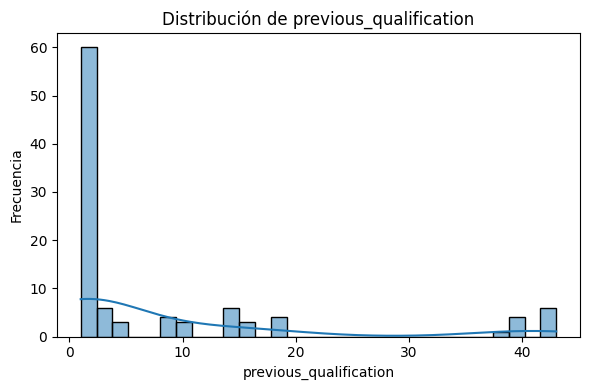

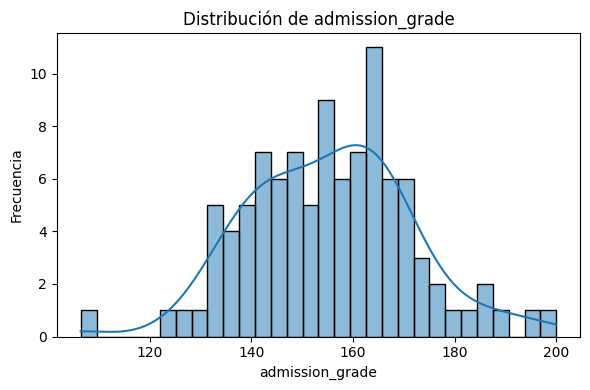

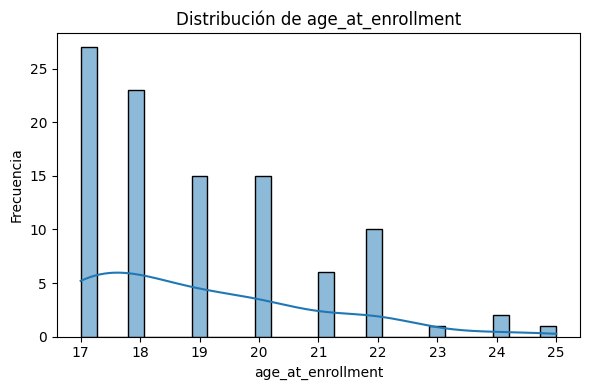

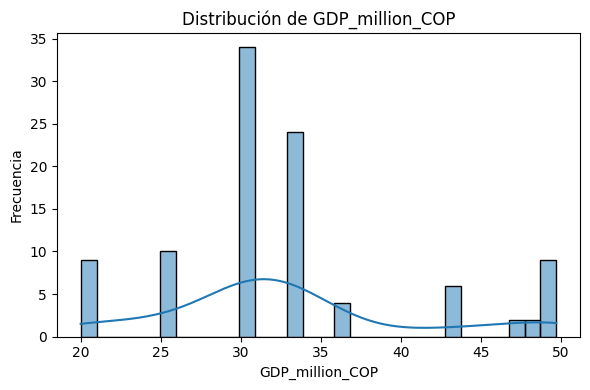

In [8]:
variables_continuas = [
    "previous_qualification",
    "admission_grade",
    "age_at_enrollment",
    "GDP_million_COP"
]

for col in variables_continuas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# 4. Conteo de variables categóricas / binarias

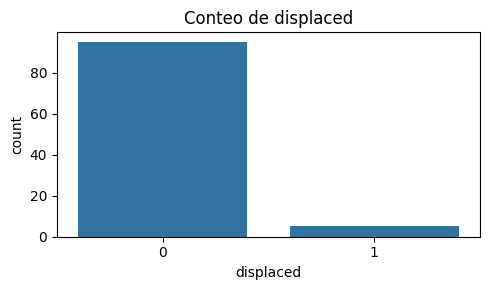

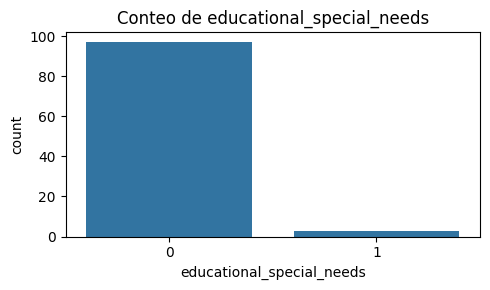

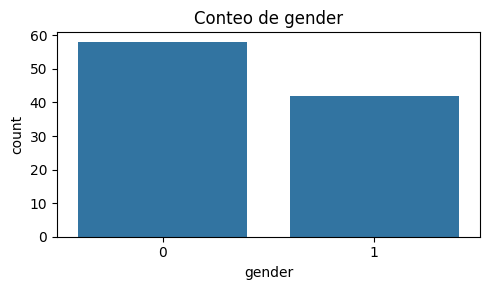

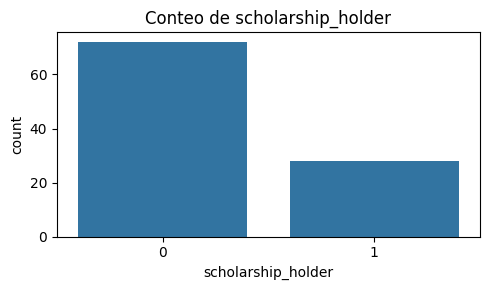

In [9]:
variables_binarias = [
    "displaced",
    "educational_special_needs",
    "gender",
    "scholarship_holder"
]

for col in variables_binarias:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Conteo de {col}")
    plt.tight_layout()
    plt.show()

# 5. Boxplots de notas por género y por beca


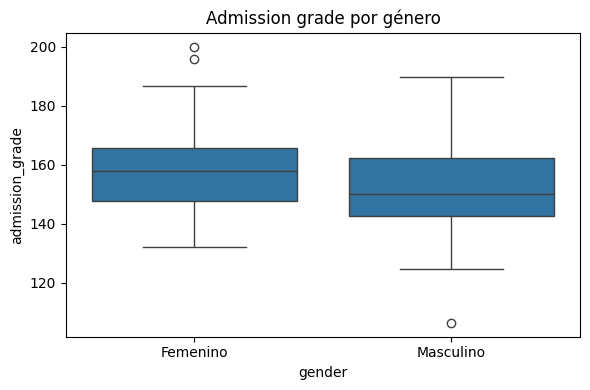

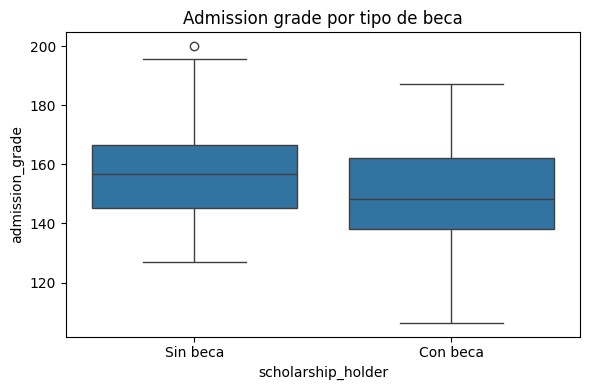

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="gender", y="admission_grade", data=df)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.title("Admission grade por género")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="scholarship_holder", y="admission_grade", data=df)
plt.xticks([0, 1], ["Sin beca", "Con beca"])
plt.title("Admission grade por tipo de beca")
plt.tight_layout()
plt.show()

# 6. Correlación entre variables numéricas

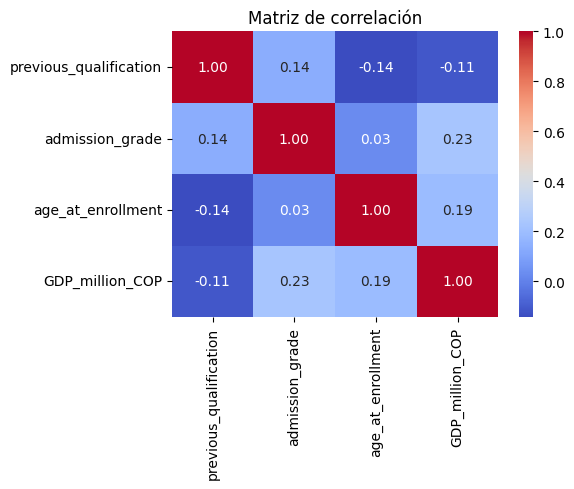

In [11]:
corr = df[variables_continuas].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

# 7. Agrupaciones estadísticas útiles

In [12]:
print("\nPromedio de Admission grade por condición de desplazado:")
print(df.groupby("displaced")["admission_grade"].describe())

print("\nPromedio de Admission grade por género:")
print(df.groupby("gender")["admission_grade"].describe())

print("\nPromedio de GDP por beca:")
print(df.groupby("scholarship_holder")["GDP_million_COP"].describe())


Promedio de Admission grade por condición de desplazado:
           count    mean        std    min     25%    50%    75%    max
displaced                                                              
0           95.0  155.78  16.244525  106.4  144.15  156.0  165.5  200.0
1            5.0  148.62  10.888388  136.3  141.70  145.2  158.2  161.7

Promedio de Admission grade por género:
        count        mean        std    min      25%     50%      75%    max
gender                                                                      
0        58.0  157.755172  15.266810  132.2  147.750  158.00  165.600  200.0
1        42.0  152.200000  16.737456  106.4  142.725  150.15  162.175  189.7

Promedio de GDP por beca:
                    count       mean       std   min   25%   50%   75%   max
scholarship_holder                                                          
0                    72.0  33.552778  8.555387  20.0  30.3  31.7  36.0  49.7
1                    28.0  31.596429  6.527746 

Diccionario de Previous qualification

In [13]:
previous_qualification_dict = {
    1: "Secondary education",
    2: "Higher ed - bachelor's",
    3: "Higher ed - degree",
    4: "Higher ed - master's",
    5: "Higher ed - doctorate",
    6: "Higher ed - frequency",
    9: "12th year - not completed",
    10: "11th year - not completed",
    12: "Other - 11th year",
    14: "10th year",
    15: "10th year - not completed",
    19: "Basic education 3rd cycle",
    38: "Basic education 2nd cycle",
    39: "Technological specialization",
    40: "Higher ed - degree (1st cycle)",
    42: "Professional technical course",
    43: "Higher ed - master (2nd cycle)"
}


Diccionario de Mother's occupation (ocupación de la madre)

In [14]:
mother_occupation_dict = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "Teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}


Diccionario de Father's occupation (ocupación del padre)

In [15]:
father_occupation_dict = {
    0: "Student",
    1: "Government/Executive Director",
    2: "Scientific Specialist",
    3: "Mid-level Technician",
    4: "Administrative staff",
    5: "Services/Security/Sales",
    6: "Farmer/Fisher/Forester",
    7: "Skilled Industry/Construction",
    8: "Machine Operator",
    9: "Unskilled Worker",
    10: "Military",
    90: "Other situation",
    99: "Unknown",
    101: "Military Officer",
    102: "Military Sergeant",
    103: "Other military",
    112: "Commercial service director",
    114: "Hotel/Trade director",
    121: "Physics/Math/Engineering Specialist",
    122: "Health professional",
    123: "Teacher",
    124: "Finance/Accounting/Public Relations",
    131: "Mid-level Science/Engineering",
    132: "Mid-level Health",
    134: "Mid-level Legal/Social/Culture",
    135: "ICT Technician",
    141: "Office/Secretary/Data Entry",
    143: "Accounting/Finance Clerk",
    144: "Other admin support",
    151: "Personal service",
    152: "Seller",
    153: "Personal care",
    154: "Security/Protection",
    161: "Market-oriented farmer",
    163: "Subsistence farmer/fisher",
    171: "Construction (non-electrician)",
    172: "Metalworking",
    174: "Electrician/Electronics",
    175: "Food/Wood/Textile/Other crafts",
    181: "Plant/machine operator",
    182: "Assembly worker",
    183: "Driver/Mobile equipment",
    192: "Unskilled agro/fishing",
    193: "Unskilled construction/industry",
    194: "Kitchen assistant",
    195: "Street vendor/service"
}


In [16]:
df["Previous qualification label"] = df["previous_qualification"].map(previous_qualification_dict)
df["Mother occupation label"] = df["mother_occupation"].map(mother_occupation_dict)
df["Father occupation label"] = df["father_occupation"].map(father_occupation_dict)


In [17]:
df[["previous_qualification", "Previous qualification label"]].head(10)

,previous_qualification,Previous qualification label
0,1,Secondary education
1,42,Professional technical course
2,10,11th year - not completed
3,3,Higher ed - degree
4,1,Secondary education
5,1,Secondary education
6,1,Secondary education
7,19,Basic education 3rd cycle
8,3,Higher ed - degree
9,9,12th year - not completed


In [18]:
df[[
    "previous_qualification", "Previous qualification label",
    "mother_occupation", "Mother occupation label",
    "father_occupation", "Father occupation label"
]].head(10)

,previous_qualification,Previous qualification label,mother_occupation,Mother occupation label,father_occupation,Father occupation label
0,1,Secondary education,125,Specialists in information and communication t...,151,Personal service
1,42,Professional technical course,90,Other Situation,99,Unknown
2,10,11th year - not completed,6,"Farmers and Skilled Workers in Agriculture, Fi...",151,Personal service
3,3,Higher ed - degree,5,"Personal Services, Security and Safety Workers...",10,Military
4,1,Secondary education,7,"Skilled Workers in Industry, Construction and ...",172,Metalworking
5,1,Secondary education,10,Armed Forces Professions,1,Government/Executive Director
6,1,Secondary education,193,"Unskilled workers in extractive industry, cons...",103,Other military
7,19,Basic education 3rd cycle,9,Unskilled Workers,1,Government/Executive Director
8,3,Higher ed - degree,2,Specialists in Intellectual and Scientific Act...,9,Unskilled Worker
9,9,12th year - not completed,0,Student,171,Construction (non-electrician)


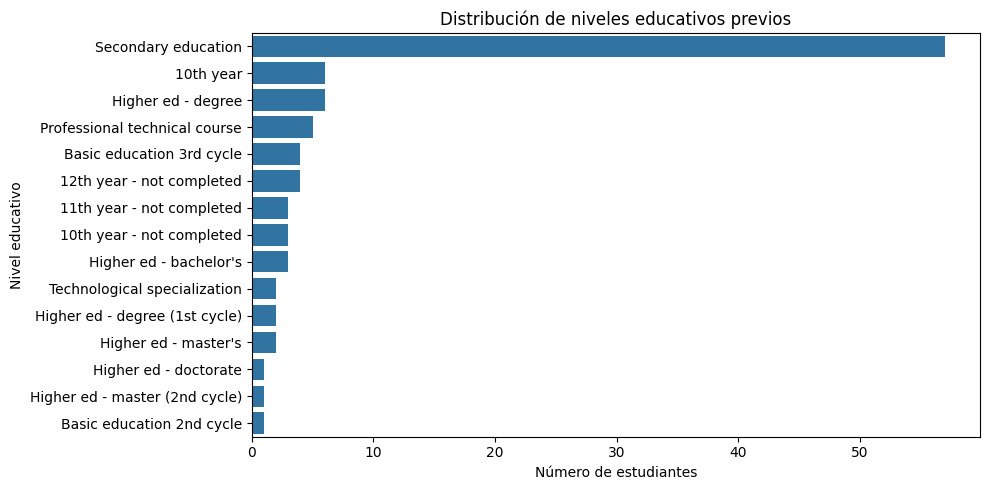

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(y="Previous qualification label", data=df, order=df["Previous qualification label"].value_counts().index)
plt.title("Distribución de niveles educativos previos")
plt.xlabel("Número de estudiantes")
plt.ylabel("Nivel educativo")
plt.tight_layout()
plt.show()


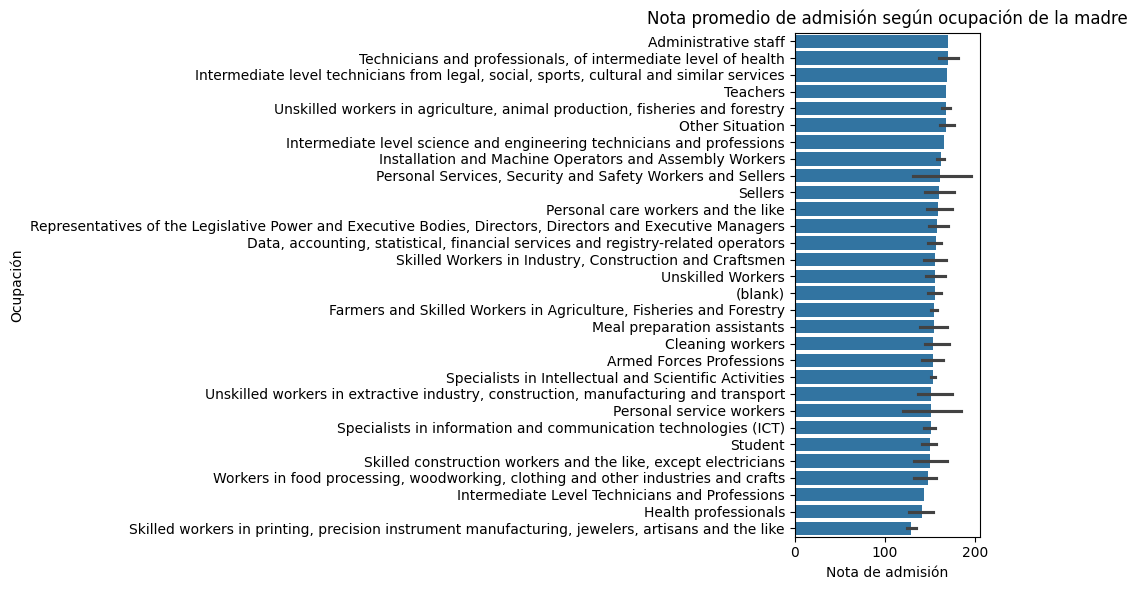

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x="admission_grade", y="Mother occupation label", data=df,
            order=df.groupby("Mother occupation label")["admission_grade"].mean().sort_values(ascending=False).index)
plt.title("Nota promedio de admisión según ocupación de la madre")
plt.xlabel("Nota de admisión")
plt.ylabel("Ocupación")
plt.tight_layout()
plt.show()


Promedio de nota de admisión por tipo de educación previa

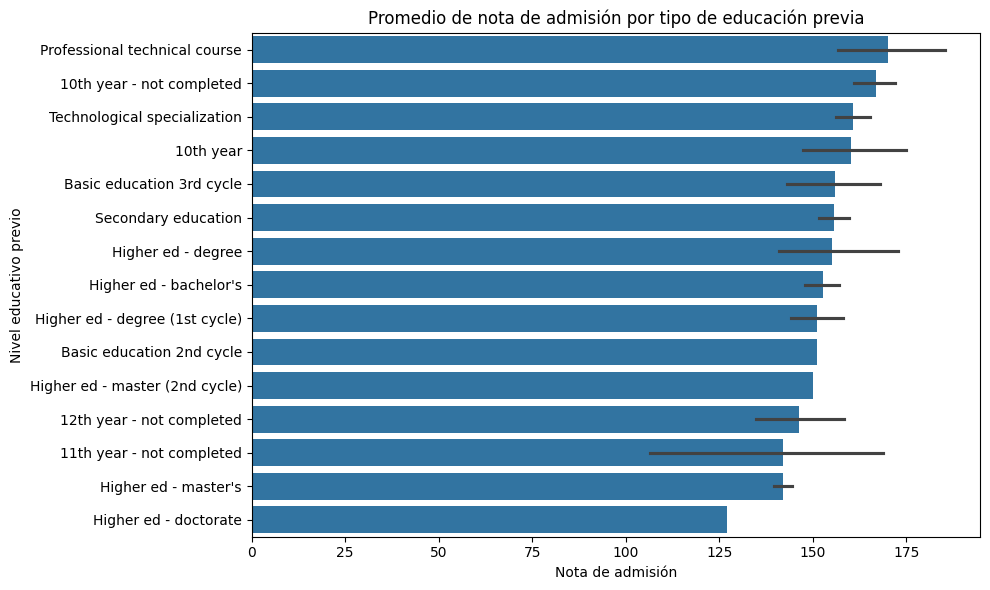

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Promedio de nota de admisión por nivel educativo previo
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x="admission_grade",
            y="Previous qualification label",
            order=df.groupby("Previous qualification label")["admission_grade"].mean().sort_values(ascending=False).index)
plt.title("Promedio de nota de admisión por tipo de educación previa")
plt.xlabel("Nota de admisión")
plt.ylabel("Nivel educativo previo")
plt.tight_layout()
plt.show()


GDP promedio por ocupación del padre o madre

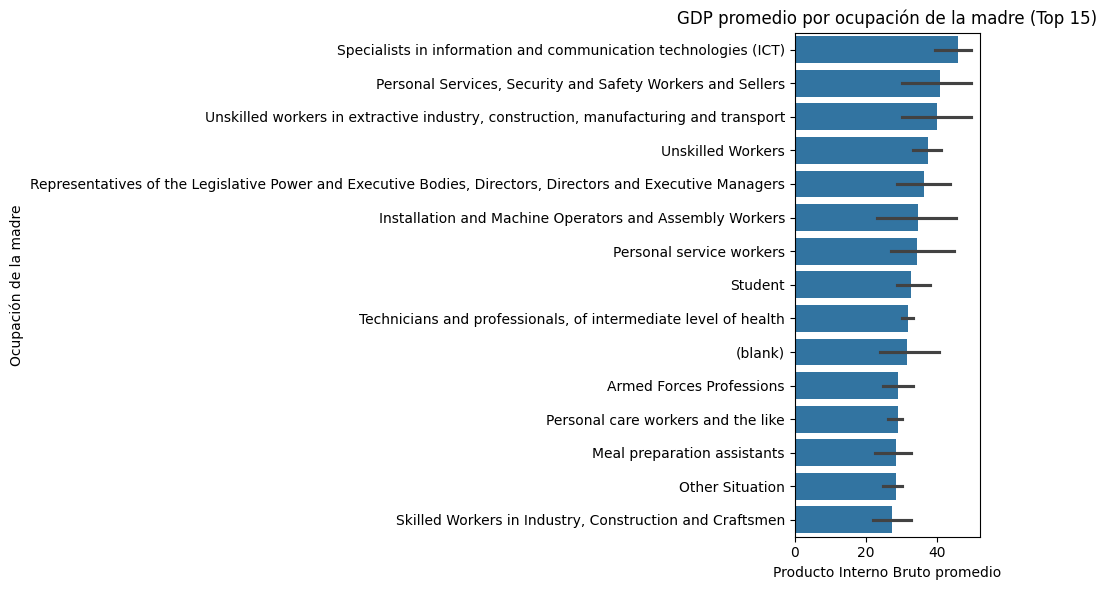

In [22]:
# Filtramos ocupaciones con mayor frecuencia para evitar categorías con muy pocos datos
top_mother_occs = df["Mother occupation label"].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df["Mother occupation label"].isin(top_mother_occs)],
    x="GDP_million_COP",
    y="Mother occupation label",
    estimator="mean",
    order=df[df["Mother occupation label"].isin(top_mother_occs)].groupby("Mother occupation label")["GDP_million_COP"].mean().sort_values(ascending=False).index
)
plt.title("GDP promedio por ocupación de la madre (Top 15)")
plt.xlabel("Producto Interno Bruto promedio")
plt.ylabel("Ocupación de la madre")
plt.tight_layout()
plt.show()


Tasa de beca por sector social

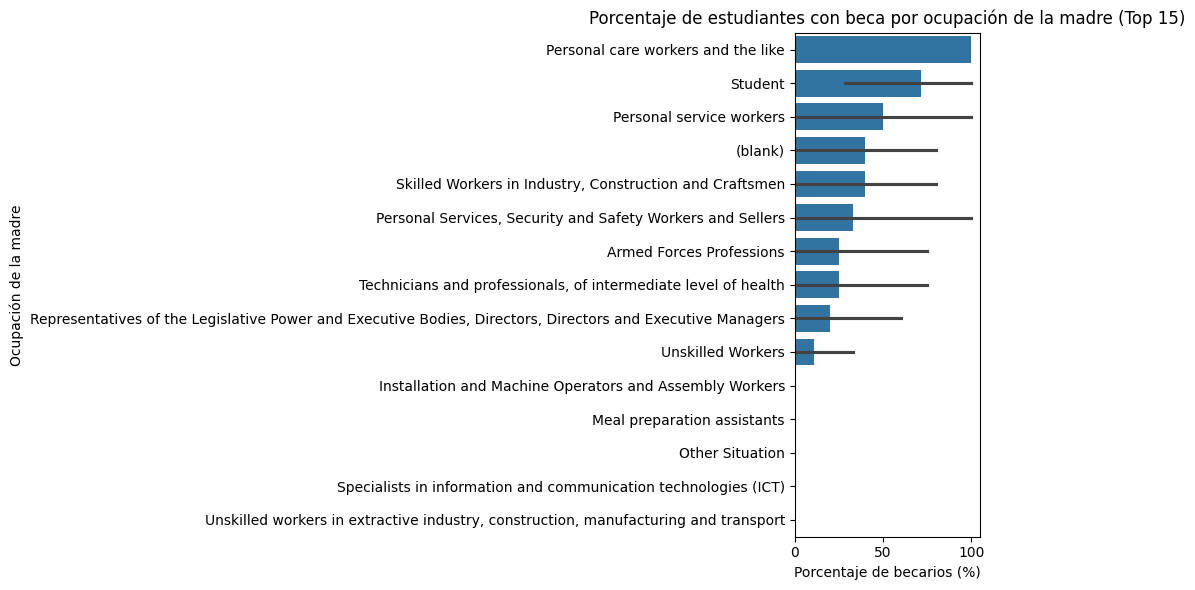

In [23]:
# Calculamos proporción de becarios
top_mother_occs = df["Mother occupation label"].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df["Mother occupation label"].isin(top_mother_occs)],
    x="scholarship_holder",
    y="Mother occupation label",
    estimator=lambda x: 100 * x.mean(),  # porcentaje
    order=df[df["Mother occupation label"].isin(top_mother_occs)].groupby("Mother occupation label")["scholarship_holder"].mean().sort_values(ascending=False).index
)
plt.title("Porcentaje de estudiantes con beca por ocupación de la madre (Top 15)")
plt.xlabel("Porcentaje de becarios (%)")
plt.ylabel("Ocupación de la madre")
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['previous_qualification', 'previous_grade', 'mother_occupation',
       'father_occupation', 'admission_grade', 'displaced',
       'educational_special_needs', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'GDP_million_COP', 'dropout',
       'previous_qualification_label', 'mother_occupation_label',
       'father_occupation_label', 'Previous qualification label',
       'Mother occupation label', 'Father occupation label'],
      dtype='object')

Modelo


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Columnas que parecen relevantes (eliminando las versiones de texto de las categóricas)
features = ['previous_qualification', 'previous_grade', 'mother_occupation', 
            'father_occupation', 'admission_grade', 'displaced', 
            'educational_special_needs', 'gender', 'scholarship_holder', 
            'age_at_enrollment', 'GDP_million_COP']

target = 'dropout'

# Seleccionar solo las columnas necesarias
data = df[features + [target]]

previous_qualification       0
previous_grade               0
mother_occupation            0
father_occupation            0
admission_grade              0
displaced                    0
educational_special_needs    0
gender                       0
scholarship_holder           0
age_at_enrollment            0
GDP_million_COP              0
dropout                      0
dtype: int64
       previous_qualification  previous_grade  mother_occupation  \
count              100.000000      100.000000         100.000000   
mean                 8.140000      149.987000          86.180000   
std                 12.644334       13.692051          76.149823   
min                  1.000000      120.200000           0.000000   
25%                  1.000000      139.450000           7.000000   
50%                  1.000000      151.150000          99.000000   
75%                 10.000000      157.250000         152.250000   
max                 43.000000      186.900000         194.000000   

  

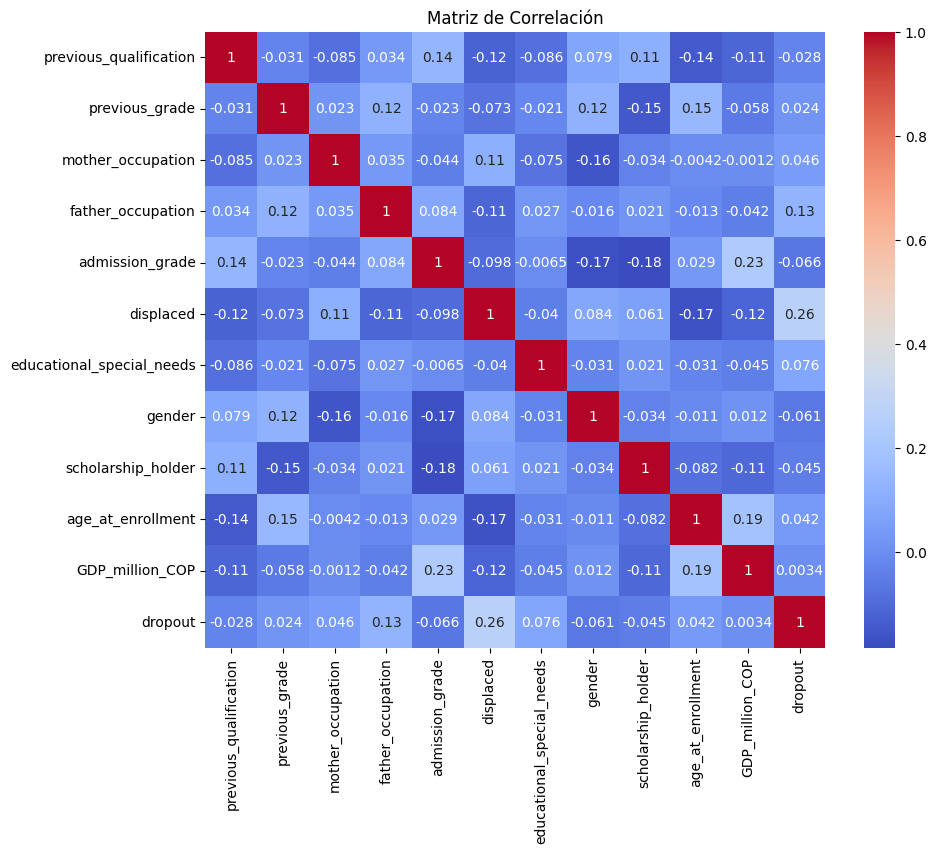

In [30]:
# Verificar valores nulos
print(data.isnull().sum())

# Estadísticas descriptivas
print(data.describe())

# Distribución de la variable objetivo
print(data[target].value_counts(normalize=True))

# Visualizar correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [31]:
# Dividir en características (X) y objetivo (y)
X = data[features]
y = data[target]

# Dividir en conjuntos de entrenamiento y prueba (70-30 o 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Ratio de clases (negativo/positivo): 4.83

Distribución de clases después de SMOTE:
dropout
0    58
1    58
Name: count, dtype: int64

Entrenando Random Forest balanceado...

Random Forest Balanceado - Performance:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.20      0.20      0.20         5

    accuracy                           0.73        30
   macro avg       0.52      0.52      0.52        30
weighted avg       0.73      0.73      0.73        30

ROC AUC: 0.408


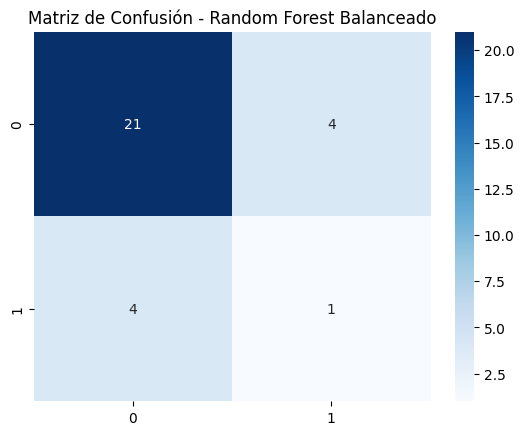


Entrenando XGBoost balanceado...

XGBoost Balanceado - Performance:


C:\Users\saale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.17      0.20      0.18         5

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.72      0.70      0.71        30

ROC AUC: 0.496


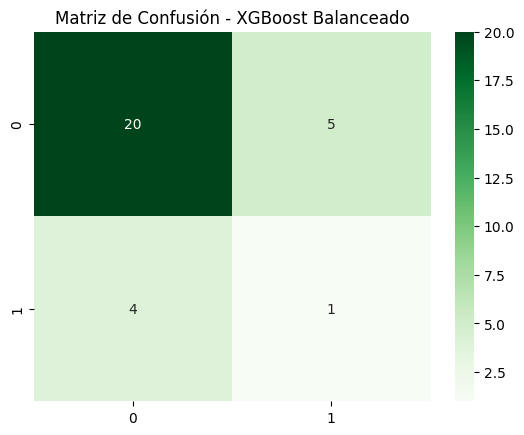


Comparación de ROC AUC:
- Random Forest: 0.408
- XGBoost: 0.496

Importancia de características - Random Forest:
                      feature  importance
4             admission_grade    0.250619
2           mother_occupation    0.186930
3           father_occupation    0.148294
10            GDP_million_COP    0.114200
1              previous_grade    0.099225
7                      gender    0.097477
9           age_at_enrollment    0.047385
0      previous_qualification    0.032064
8          scholarship_holder    0.023021
5                   displaced    0.000785
6   educational_special_needs    0.000000


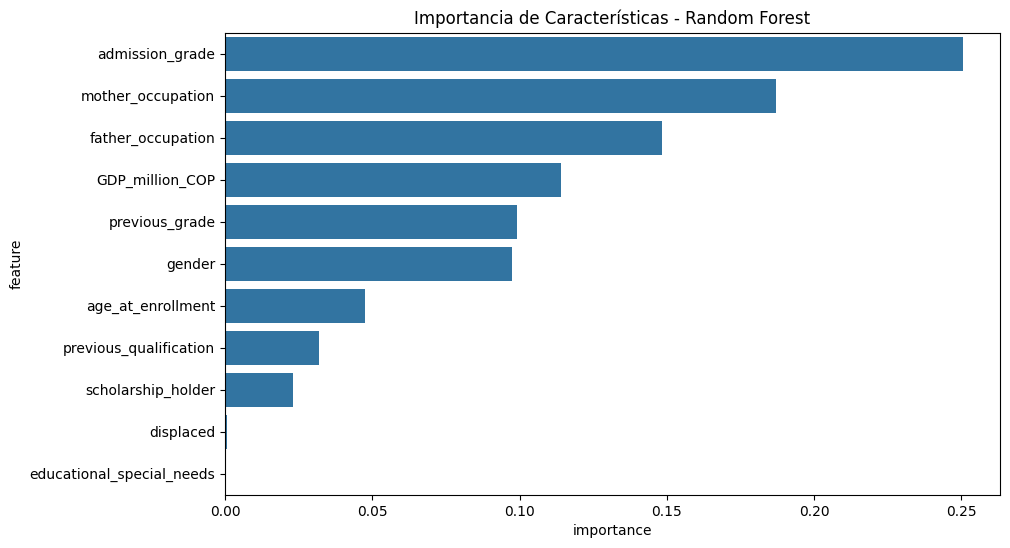

In [34]:
from imblearn.over_sampling import SMOTE

# 3. Calcular el ratio de clases para XGBoost
ratio_clases = sum(y_train == 0) / sum(y_train == 1)
print(f"Ratio de clases (negativo/positivo): {ratio_clases:.2f}")

# 4. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar el balance después de SMOTE
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# 5. Entrenar Random Forest balanceado
print("\nEntrenando Random Forest balanceado...")
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
rf_balanced.fit(X_train_bal, y_train_bal)

# Evaluar Random Forest
y_pred_rf = rf_balanced.predict(X_test)
y_prob_rf = rf_balanced.predict_proba(X_test)[:, 1]

print("\nRandom Forest Balanceado - Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest Balanceado')
plt.show()

# 6. Entrenar XGBoost balanceado
print("\nEntrenando XGBoost balanceado...")
xgb_balanced = XGBClassifier(
    scale_pos_weight=ratio_clases,
    eval_metric='aucpr',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)
xgb_balanced.fit(X_train_bal, y_train_bal)

# Evaluar XGBoost
y_pred_xgb = xgb_balanced.predict(X_test)
y_prob_xgb = xgb_balanced.predict_proba(X_test)[:, 1]

print("\nXGBoost Balanceado - Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.3f}")

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - XGBoost Balanceado')
plt.show()

# 7. Comparación de modelos
print("\nComparación de ROC AUC:")
print(f"- Random Forest: {roc_auc_score(y_test, y_prob_rf):.3f}")
print(f"- XGBoost: {roc_auc_score(y_test, y_prob_xgb):.3f}")

# 8. Análisis de importancia de características (para el mejor modelo)
print("\nImportancia de características - Random Forest:")
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': rf_balanced.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de Características - Random Forest')
plt.show()